In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt



This code reads in the csv file. I then looked at the most common similar titles and relabeled the ones that made sense. Ideally I'd send in a dictionary and change anything with those terms but I ran out of time. This also creates a new column labeled year from the date published so I can group by that later

In [4]:
df = pd.read_csv('DrugData.csv')
df= df.dropna(subset = ['Sold As'])
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('MDMA / Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Molly / Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Molly','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('MDMA / MDMA','MDMA'))
df['Year']=df['Date Published'].apply(lambda x: x[-4:])

In [5]:
df['Year'] = df['Year'].astype(int)

Looking at the column labels

In [6]:
df['Sold As'].value_counts()

MDMA                                     2557
Not Specified                             193
LSD                                       188
Cocaine                                    90
Alprazolam                                 86
                                         ... 
3F-A-PVP                                    1
ketamine                                    1
325mg Acetaminophen, 10mg Hydrocodone       1
alphaPHP                                    1
Roxicodone                                  1
Name: Sold As, Length: 535, dtype: int64

Creating seperate data frames in case I want to do various slices on different substances

In [6]:
df_MDMA = df.loc[df['Sold As']=='MDMA']
df_LSD = df.loc[df['Sold As']=='LSD']
df_Cocaine = df.loc[df['Sold As']=='Cocaine']

In [7]:
df_MDMA.shape

(2557, 9)

Creating the column to check wheter the substance is what it was supposed to be

In [8]:
df_MDMA['Match'] = np.where(df_MDMA['Sold As']==df_MDMA['Substance'], 'Yes', 'No')
df['Match'] = np.where(df['Sold As']==df['Substance'], 'Yes', 'No')
df_LSD['Match'] = np.where(df_LSD['Sold As']==df_LSD['Substance'], 'Yes', 'No')
df_Cocaine['Match'] = np.where(df_Cocaine['Sold As']==df_Cocaine['Substance'], 'Yes', 'No')

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is try

In [9]:
df_MDMA['Match'].groupby(df_MDMA['Year']).value_counts()

Year  Match
2014  No        13
      Yes       10
2015  Yes      146
      No        90
2016  Yes      226
      No        80
2017  Yes      422
      No        80
2018  Yes      601
      No        92
2019  Yes      603
      No        65
2020  Yes      122
      No         7
Name: Match, dtype: int64

In [10]:
df_LSD['Match'].groupby(df_LSD['Year']).value_counts()

Year  Match
2015  Yes      15
      No        5
2016  Yes      24
      No        9
2017  Yes      16
      No        8
2018  Yes      30
      No        7
2019  Yes      53
      No       12
2020  No        6
      Yes       3
Name: Match, dtype: int64

In [11]:
df_Cocaine['Match'].groupby(df_Cocaine['Year']).value_counts()

Year  Match
2010  Yes       1
2012  Yes       1
2015  Yes      13
2016  Yes      11
      No        1
2017  Yes      12
2018  Yes      25
      No        3
2019  Yes      14
      No        2
2020  Yes       7
Name: Match, dtype: int64

Making new dataframes with the match and then the percent. Stacking them after for graphing purposes

In [12]:
data = df['Match'].groupby(df['Year']).value_counts().unstack()
data_MDMA = df_MDMA['Match'].groupby(df_MDMA['Year']).value_counts().unstack()
data_LSD = df_LSD['Match'].groupby(df_LSD['Year']).value_counts().unstack()
data_Cocaine = df_Cocaine['Match'].groupby(df_Cocaine['Year']).value_counts().unstack()

In [13]:
data_MDMA['Percent']=data_MDMA['Yes']/(data_MDMA['Yes']+data_MDMA['No'])
data_LSD['Percent']=data_LSD['Yes']/(data_LSD['Yes']+data_LSD['No'])
data_Cocaine['Percent']=data_Cocaine['Yes']/(data_Cocaine['Yes']+data_Cocaine['No'])
data['Percent']=data['Yes']/(data['Yes']+data['No'])

In [14]:
data = data.dropna(subset = ['Percent'])
data_MDMA = data_MDMA.dropna(subset = ['Percent'])
data_LSD = data_LSD.dropna(subset = ['Percent'])
data_Cocaine = data_Cocaine.dropna(subset = ['Percent'])




In [15]:
data['Substance'] = 'Total'

In [74]:
data_MDMA['Substance']= "MDMA"
data_MDMA.drop([2020],inplace = True)

In [75]:
data_LSD['Substance'] = 'LSD'
data_LSD.drop([2020],inplace = True)

In [18]:
data_Cocaine['Substance'] = 'Cocaine'
data_Cocaine

Match,No,Yes,Percent,Substance
Year,,,,
2016,1.0,11.0,0.916667,Cocaine
2018,3.0,25.0,0.892857,Cocaine
2019,2.0,14.0,0.875000,Cocaine


In [76]:
stacked = pd.concat([data_MDMA,data_LSD,data_Cocaine],axis = 0)
stacked['Percent'] = stacked['Percent']*100


In [77]:
stacked

Match,No,Yes,Percent,Substance
Year,,,,
2014,13.0,10.0,43.478261,MDMA
2015,90.0,146.0,61.864407,MDMA
2016,80.0,226.0,73.856209,MDMA
2017,80.0,422.0,84.063745,MDMA
2018,92.0,601.0,86.724387,MDMA
2019,65.0,603.0,90.269461,MDMA
2015,5.0,15.0,75.000000,LSD
2016,9.0,24.0,72.727273,LSD
2017,8.0,16.0,66.666667,LSD


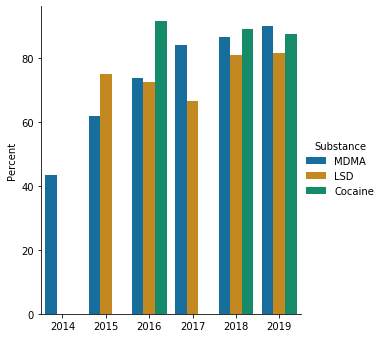

In [78]:

plot = sns.catplot(x = list(stacked.index) , y = 'Percent', hue = 'Substance',data = stacked, kind = 'bar',palette = 'colorblind')

plot.set_axis_labels("",'Percent')

